In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# let's start by analyzing the house of representative data

Since we are interested in the finances of the campaign, lets see how much is spent on campaign in each district in a state

In [3]:
H_df = pd.read_csv('../data_secgrp/H_df.csv')

In [4]:
Amt_per_sta_ds = H_df.groupby(['can_off_sta', 'can_off_dis'])['net_con'].sum().to_frame(name = "total_dis_sum").reset_index()
Amt_per_sta_ds.head()

,can_off_sta,can_off_dis,total_dis_sum
0,AK,0.0,1051122.00
1,AL,1.0,1328469.68
2,AL,2.0,1505342.28
3,AL,3.0,1106073.04
4,AL,4.0,1349214.09


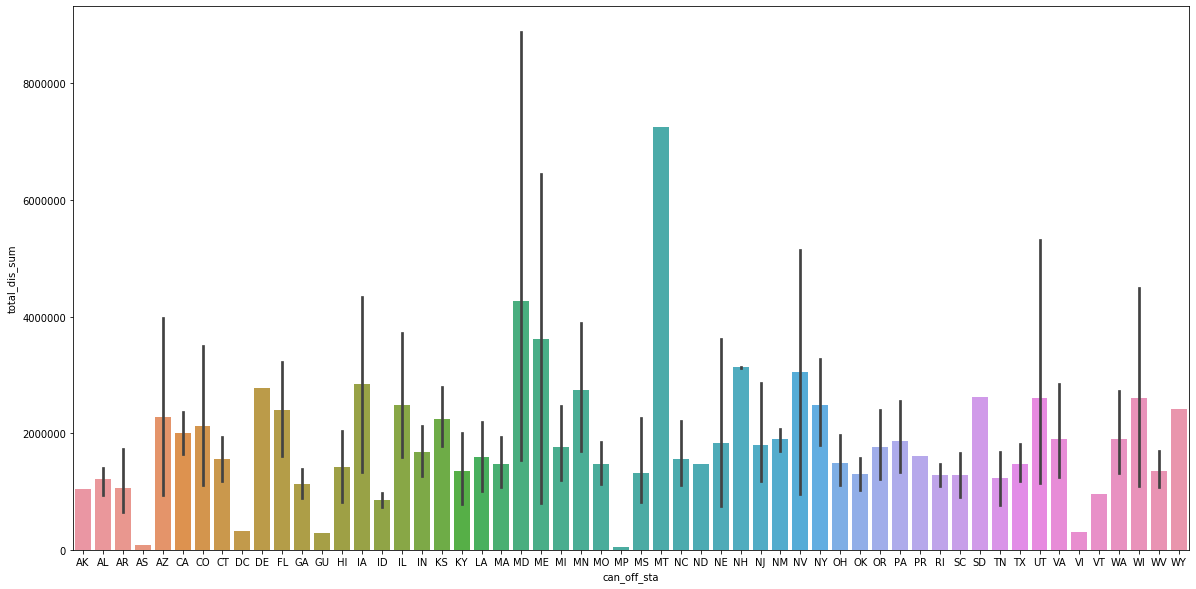

In [5]:
#visualize the state with high spending

plt.figure(figsize=(20,10))

ax = sns.barplot(x="can_off_sta", y="total_dis_sum", data=Amt_per_sta_ds)

We can clearly see that the highest spending state in terms of house of reps election is the MT, let's now go further to analyze the state with the highest net_contribution

In [6]:
mt_comp = H_df.loc[H_df['can_off_sta'] == 'MT']
mt_comp

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_cit,can_sta,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,cov_sta_dat,cov_end_dat,winner,votes,campaign_duration
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,WHITEFISH,MT,...,"$83,815.78","$399,122.61",4938943.5,"$5,055,942.15",NaN,2015-01-01,2016-10-19,Y,280476.0,657
512,H6MT01095,"JUNEAU, DENISE",H,MT,0.0,DEM,CHALLENGER,PO BOX 563,HELENA,MT,...,NaN,"$491,337.79",2317465.0,"$1,831,515.23",NaN,2015-11-04,2016-10-19,N,NaN,350


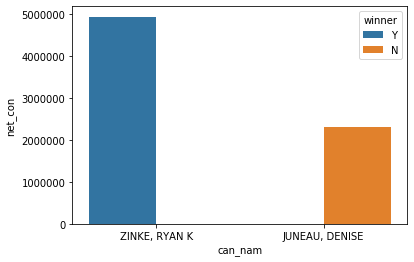

In [7]:
ax = sns.barplot(x='can_nam', y='net_con', hue = 'winner',data=mt_comp)

**Observation**
1. **we can see the state has just one district with only two competitors, yet they have the higest rate of spending this can be due to a various reasons that are sadly not contained in the data. suggestions include:**
    * The cost of getting things done in that state is relatively high in comparison to other states
    * Being in direct competition creates just one collision point for the candidates 
2. **we can also see that the candidate with the highest spending won the election**


    

we can clearly see that for state MT with just one district, the higest spender won the vote, however, before we conclude, let's check how long each candidate campaigned for.
* reason behind this is the fact that time plays a role in the maturity of an investment. so assuming the campaign is the investemnt, net_con is the invested capital, how long will it take for the said investement to mature. 
* naturally, the longer you keep your investment, the higher your profit gets, therefore, it should hold that the longer you campaign, the more likely it is for you to win, we check if this assumption holds

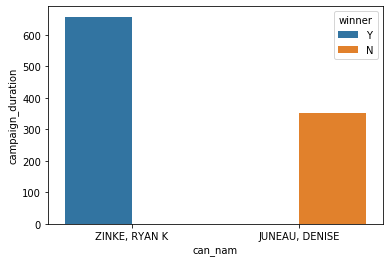

In [9]:
ax = sns.barplot(x='can_nam', y='campaign_duration',hue='winner', data=mt_comp)

**Observation**
* The investment assumption holds

In [10]:
competitors = H_df.groupby(['can_off_sta', 'can_off_dis'])['can_id'].count().to_frame(name = "num_of_comp").reset_index()
#eliminate data points where num_of_comp <= 1
#this means that these positions are unopposed
competitors = competitors[competitors['num_of_comp'] > 1]

In [11]:
competitors.head()

,can_off_sta,can_off_dis,num_of_comp
1,AL,1.0,2
2,AL,2.0,3
3,AL,3.0,3
4,AL,4.0,2
5,AL,5.0,2


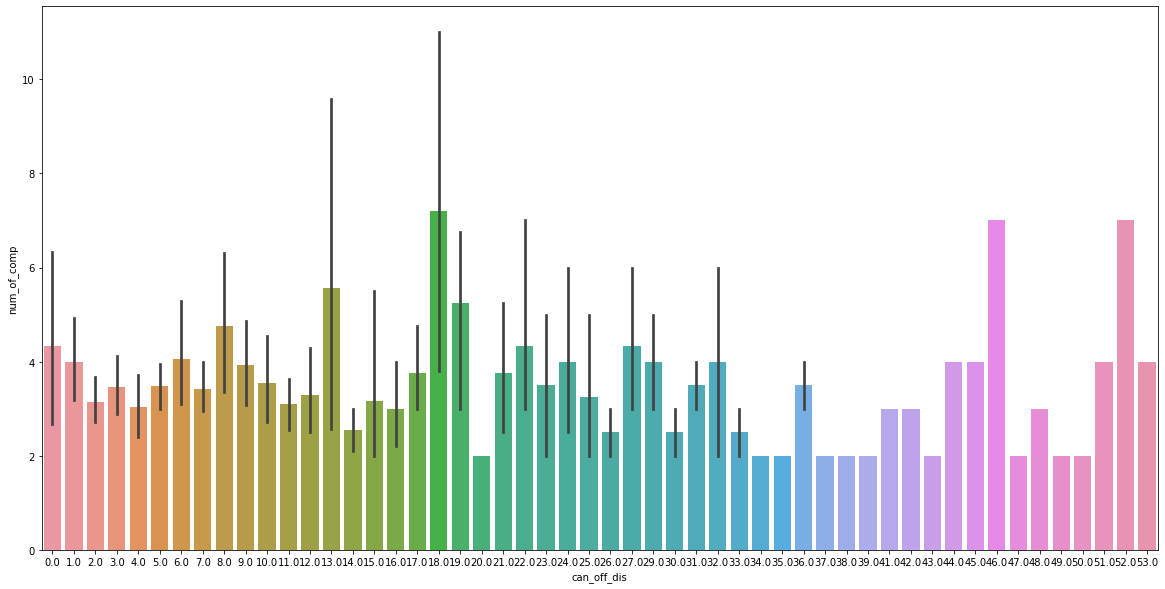

In [12]:
plt.figure(figsize=(20,10))

ax = sns.barplot(x="can_off_dis", y="num_of_comp", data=competitors)

**Observation**
* here we can see every district represented in our dataset clearly and the number of competitors

### Before generalizing, let's pick a state at random and test the result of our early analysis

In [13]:
al_comp = H_df.loc[H_df['can_off_sta'] == 'AL']
al_comp.shape

(15, 42)

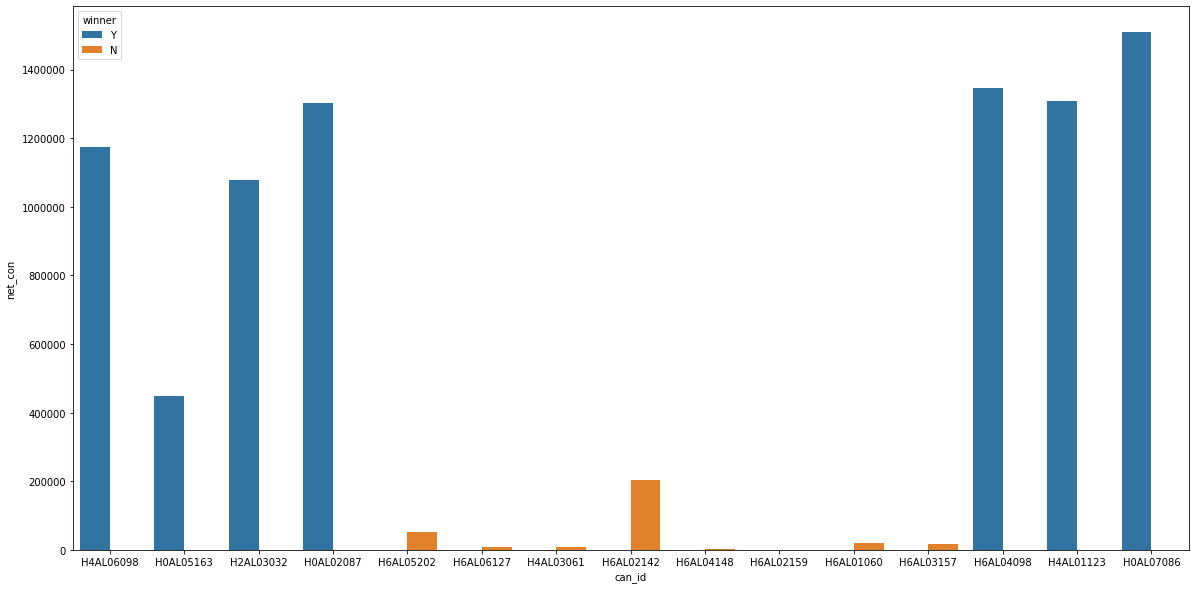

In [14]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='can_id', y='net_con', hue = 'winner',data=al_comp)

**Inference**
* assumption on the relationship between how much a candidate spends on election and winning holds
* visualize to see what the range of highest amount spent is

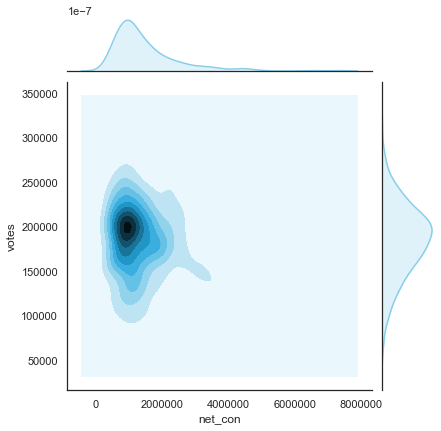

In [16]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=H_df["net_con"], y=H_df["votes"], kind='kde', color="skyblue")

**by this inspection, we can see the concentration of where the most money is spent and the expected voters**

# Notebook summary
* there's is a strong positive relationship between the money spent by a candidate and the outcome of their election